## Laptop Pricing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [3]:
#import the data
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)

## Single linear regression
known: CPU_frequency has the lowest p-value of the dataset features.
Create: Single feature linear regression that fits CPU_frequency and Price

In [5]:
lm = LinearRegression()
X = df[['CPU_frequency']]
Y = df['Price']
lm.fit(X,Y)

Yhat=lm.predict(X)

Generate distribution plot for predicted and actual values.

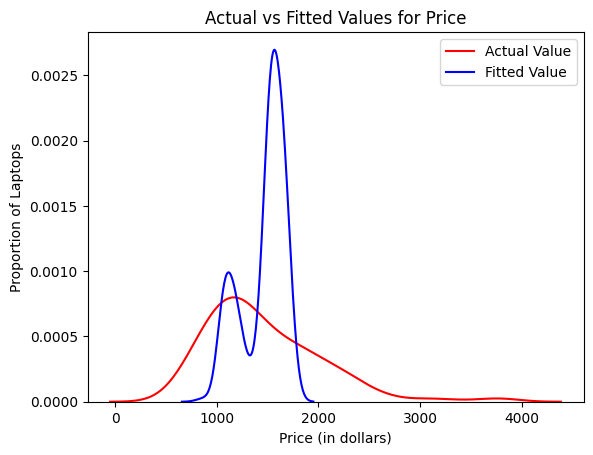

In [6]:
# this line of code is creating a red kernel density estimate (KDE) plot of the 'Price' column from the DataFrame df, and it labels this plot as "Actual Value". The variable ax1 will hold the Axes object returned by the plot, which can be used for further customization or adding more plots to the same Axes.
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
#add Yhat from above to the plot created in the previous step, this step gives the Y values?
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value','Fitted Value'])
plt.show()

In [7]:
# evaluate the mean squared error and R^2 values for the model
mse = mean_squared_error(df['Price'], Yhat)
r_squared = r2_score(df['Price'], Yhat)
print('Mean Squared Error:', mse, '. R^2:', r_squared, '.')

Mean Squared Error: 284583.4405868629 . R^2: 0.1344436321024326 .


In [8]:
#their code for the above
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


## Multiple linear regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [9]:
# multiple linear regression
mlr = LinearRegression()
predictors = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
#Y created above but noting it here for clarity
#Y = df['Price']
mlr.fit(predictors, Y)
Yhat_mlr = mlr.predict(predictors)

Text(0, 0.5, 'Proportion of Laptops')

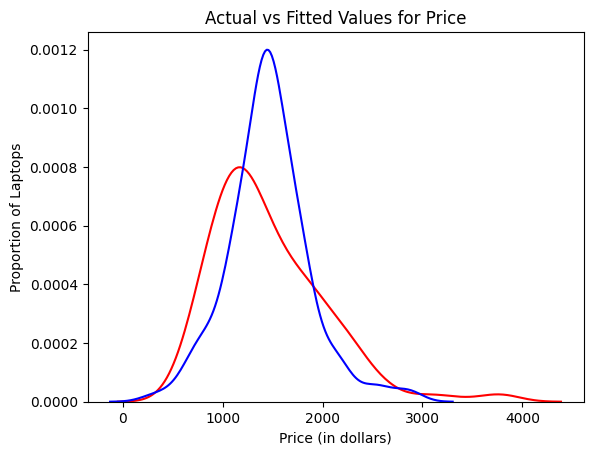

In [11]:
# plot predicted and actual values
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Laptops')


In [12]:
# R^2 and MSE
r_squared_mlr = mlr.score(predictors, Y)
mse_mlr = mean_squared_error(df['Price'], Yhat_mlr)
print('The R-square for Multiple Linear Regression is: ', r_squared_mlr, '. The mean square error of price and predicted value is: ', mse_mlr)



The R-square for Multiple Linear Regression is:  0.5082509055187374 . The mean square error of price and predicted value is:  161680.57263893107


The multiple linear regression has a higher R^2 (0.5) than the singld linear regression (0.1). Therefore the mlr explains more of the variability in price than does the slr. The mean squared error in the mlr is smaller (161,680.6) than that of the slr (284,583.4). Therefore the average squared difference between the predicted and actual values is smaller in the mlr than in the slr. 

## Polynomial regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit.

### Code below explained
`X.to_numpy()`: Converts the data structure X (which might be a Pandas DataFrame or Series) to a NumPy array.
`.flatten()`: Converts the NumPy array to a 1-dimensional array. This is useful if X is a multi-dimensional array and you want to ensure it's a flat, 1D array.

`np.polyfit(X, Y, 1)`: Fits a 1st-degree polynomial (a straight line) to the data points (X, Y). This function returns the coefficients of the polynomial.
`np.poly1d(f1)`: Creates a polynomial object `p1` from the coefficients `f1`. This polynomial object can be used to evaluate the polynomial or to generate polynomial functions.

`np.polyfit(X, Y, 3)`: Fits a 3rd-degree polynomial to the data points `(X, Y)`. This function returns the coefficients of the polynomial.
`np.poly1d(f3)`: Creates a polynomial object `p3` from the coefficients `f3`.

`np.polyfit(X, Y, 5)`: Fits a 5th-degree polynomial to the data points `(X, Y)`. This function returns the coefficients of the polynomial.
`np.poly1d(f5)`: Creates a polynomial object `p5` from the coefficients `f5`.

<b>Summary</b>
In summary, the code:

Converts X to a 1-dimensional array.
Fits three different polynomial models to the data:
A linear model (1st-degree polynomial).
A cubic model (3rd-degree polynomial).
A 5th-degree polynomial model.
Creates polynomial functions (p1, p3, p5) corresponding to these fits, which can be used for further analysis, prediction, or plotting.

In [13]:
# X & Y were defined above in Single Linear Regression
#convert X to a 1-dimensional array and flatten it
X = X.to_numpy().flatten()
#fit a 1st degree polynomial (linear fit) to the data
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

#fit a 3rd degree polynomial to the data
f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

#fit a 5th degree polynomial to the data
f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)


In [14]:
# createa  function to plot the polynomical response over the actual data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

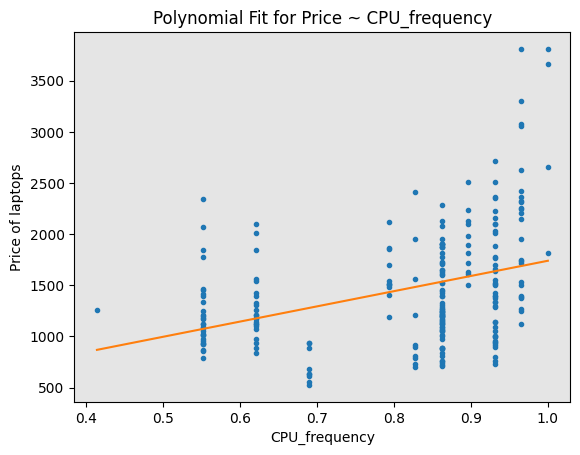

In [15]:
# plot the three polynomical models created above
PlotPolly(p1,X,Y, 'CPU_frequency')

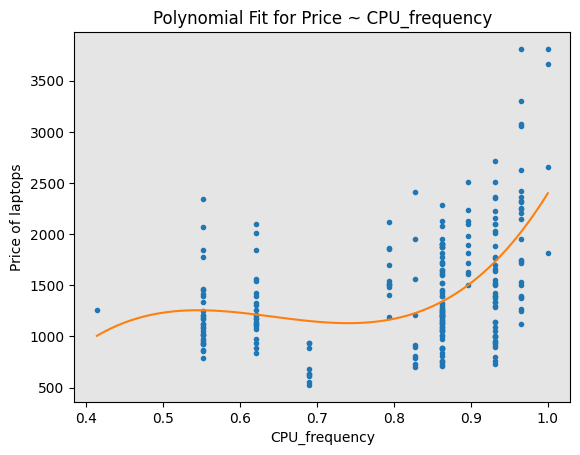

In [16]:
#plot the 3rd degree polynomial
PlotPolly(p3,X,Y, 'CPU_frequency')

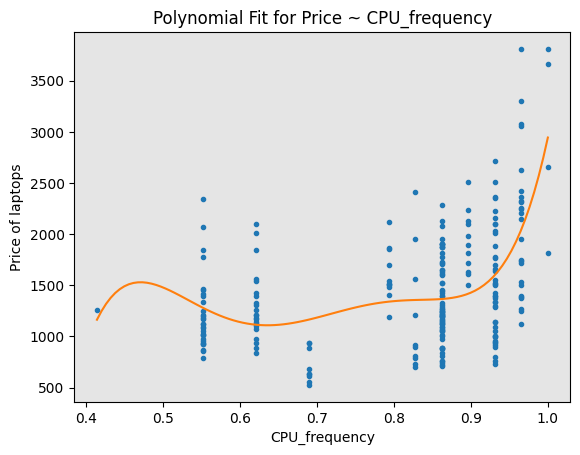

In [17]:
# plot the 5th degree polynomial
PlotPolly(p5,X,Y, 'CPU_frequency')

In [18]:
# calculate R^2 and MSE for the polynomial models
r_squared_p1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_p1)
r_squared_p3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_p3)
r_squared_p5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_p5)

print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y, p1(X)))
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y, p3(X)))
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y, p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The R-square value for 3rd degree polynomial is:  0.26692640796531175
The R-square value for 5th degree polynomial is:  0.30308227064434945
The MSE value for 1st degree polynomial is:  284583.4405868629
The MSE value for 3rd degree polynomial is:  241024.86303848747
The MSE value for 5th degree polynomial is:  229137.29548054843


The 5th degree polynomial is the best fit

## Pipeline
Create a pipeline that performs parameter scaling, polynomial feature generation, and linear regression.

### Code below explained
`Input`: This list defines the steps of the pipeline.

- (`'scale', StandardScaler())`: This step scales the features to have zero mean and unit variance using StandardScaler().
- (`'polynomial', PolynomialFeatures(include_bias=False))`: This step generates polynomial and interaction features. include_bias=False means it will not include the bias (intercept) term in the output features.
- `('model', LinearRegression())`: This step applies the linear regression model.

`pipe = Pipeline(Input)`: This creates a pipeline object with the defined steps. The pipeline ensures that the transformations and the model are applied sequentially.

Convert to float for machine learning models

`pipe.fit(predictors, Y)`: This fits the pipeline to the data. The data `predictors` is first scaled, then polynomial features are generated, and finally, the linear regression model is fitted to the transformed data with `Y` as the target variable.

`ypipe = pipe.predict(predictors)`: This makes predictions using the fitted pipeline. The data `predictors` is transformed (scaled and polynomial features generated) and then passed through the fitted linear regression model to get the predictions `ypipe`.

This pipeline approach simplifies the workflow by chaining together preprocessing steps and the model fitting process, ensuring that the same transformations are applied to both the training data and any new data when making predictions.

In [19]:
# define the pipeline
# predictors and Y defined above in Multiple Linear Regression
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model', LinearRegression())]
pipe = Pipeline(Input)
# convert data to float
predictors = predictors.astype(float)
#fit the pipeline to the data
pipe.fit(predictors, Y)
#make predictions
ypipe = pipe.predict(predictors)

In [20]:
# evaluate R^2 and MSE for the predicted values
print('R^2 for the multi-variable polynomial pipeline is', r2_score(Y, ypipe))
print('MSE for the multi-variable polynomial pipeline is', mean_squared_error(Y, ypipe))

R^2 for the multi-variable polynomial pipeline is 0.631828702952055
MSE for the multi-variable polynomial pipeline is 121049.83375459559


multiple linear regression extended with polynomial features has the best R^2 value.